经营分析（60分）：

1.对销售数据进行统计分析，用折线图展示每天的销售额变化趋势，并分析销售额最高和最低的日期。

2.绘制生鲜类商品和一般商品每天销售金额的折线图，并分析比较两类产品的销售状况。

3.利用饼图展示商品大类的销量占比。

客户画像分析（40分）

4.找出累计消费排名前十的客户；

5.基于RFM模型找出重要价值客户和重要挽留客户，并给出维护措施。

In [1]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#plt.rcParams['font.sans-serif'] = 'WenQuanYi Zen Hei'
#plt.rcParams['axes.unicode_minus'] = False
#设置字体 Windows
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来显示中文
plt.rcParams["axes.unicode_minus"] = False  # 用来显示负号

In [3]:
# 查看数据
data=pd.read_csv('./supermarket_data_riqi.csv')
data.head()

,编号,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
0,1,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2020-01-01,202001,DW-1201090311,,生鲜,个,8.0,4.0,2.0,否
1,2,1,20,粮油,2014,酱菜类,201401,榨菜,2020-01-01,202001,DW-2014010019,60g,一般商品,袋,6.0,3.0,0.5,否
2,3,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2020-01-01,202001,DW-1505020011,150g,一般商品,袋,1.0,2.4,2.4,否
3,4,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2020-01-01,202001,DW-1503050035,500g,一般商品,袋,1.0,6.5,8.3,否
4,5,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2020-01-01,202001,DW-1505020020,100g*8,一般商品,袋,1.0,11.9,11.9,否


In [4]:
data.dtypes

编号        int64
顾客编号      int64
大类编码      int64
大类名称     object
中类编码      int64
中类名称     object
小类编码      int64
小类名称     object
销售日期     object
销售月份      int64
商品编码     object
规格型号     object
商品类型     object
单位       object
销售数量    float64
销售金额    float64
商品单价    float64
是否促销     object
dtype: object

1.对销售数据进行统计分析，求出总销售金额及每天的销售金额，用折线图展示每天的销售额变化趋势。

In [5]:
data['销售金额'].sum()

454214.25

In [6]:
data['销售日期']=pd.to_datetime(data['销售日期'])
group_month=data.groupby('销售日期').agg(总金额=('销售金额','sum'))
group_month

,总金额
销售日期,
2020-01-01,2870.73
2020-01-02,3558.75
2020-01-03,2531.34
2020-01-04,2617.91
2020-01-05,3191.29
...,...
2020-04-26,4465.21
2020-04-27,2553.21
2020-04-28,2644.64


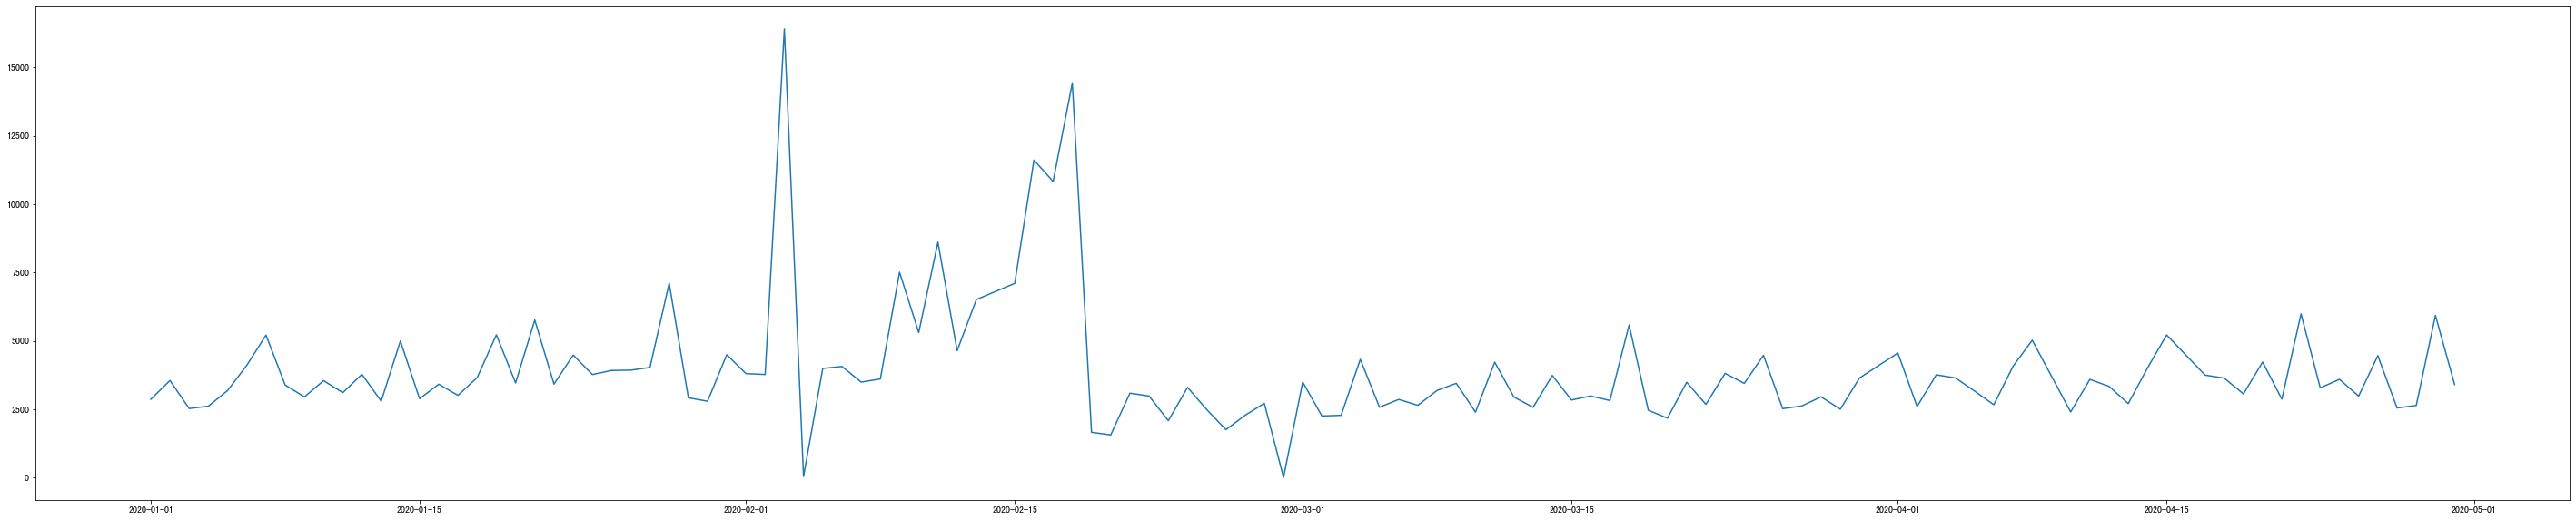

In [7]:
fig=plt.figure(figsize=(50,10))
plt.plot(group_month)

2.用散点图展示每个商品小类的销售数量和销售金额。

In [8]:
pivot_product=data.pivot_table(index='小类名称',
                        values=['销售金额','销售数量'],
                        aggfunc={'销售金额':'sum','销售数量':'sum'})

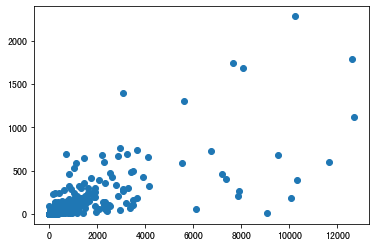

In [9]:
plt.scatter(x='销售金额', y='销售数量', data=pivot_product)

3.利用柱状图展示商品大类的销量。

In [10]:
group_month=data.groupby('大类名称').agg(总金额=('销售金额','sum'))
group_month

,总金额
大类名称,
休闲,74145.20
冲调,13957.60
家居,6311.10
家电,853.90
文体,1970.30
日配,81958.30
水产,2891.00
洗化,38013.80
烘焙,110.90


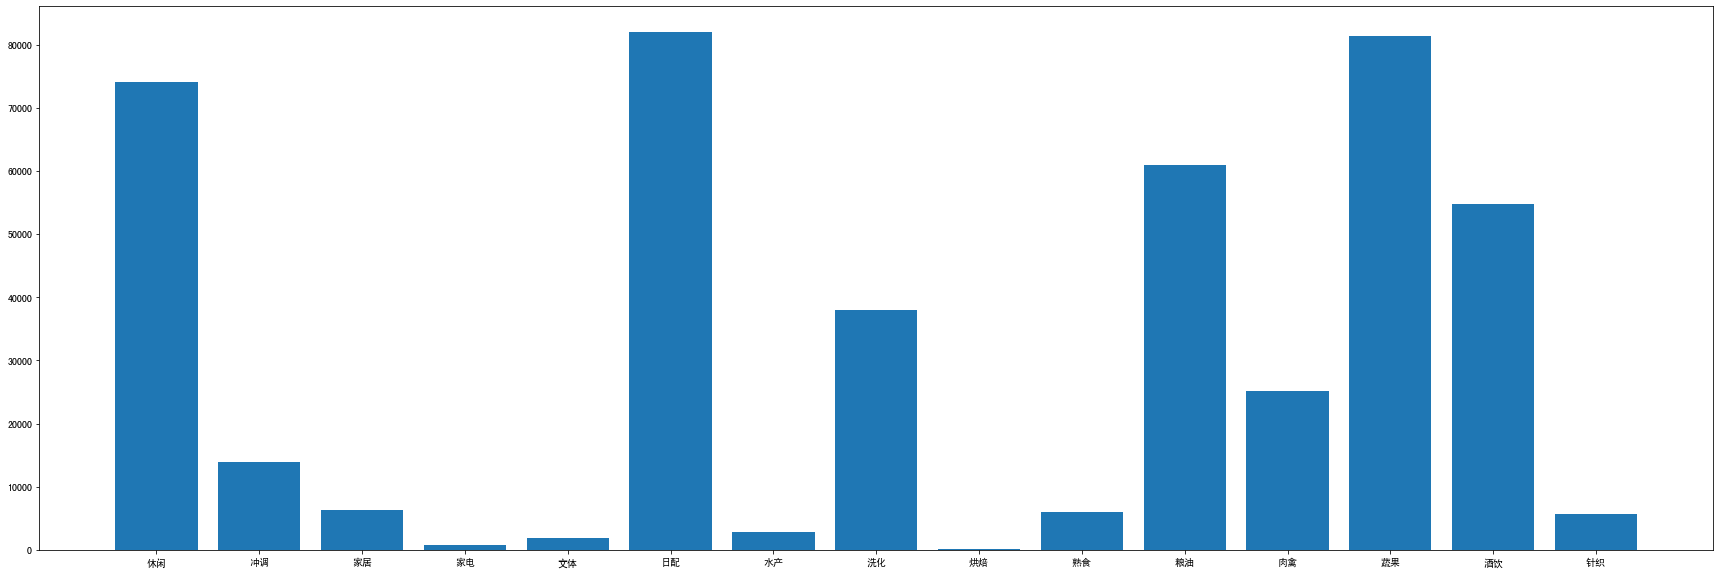

In [11]:
fig=plt.figure(figsize=(30,10))
plt.bar(group_month.index,group_month['总金额'])
plt.show()

4.找出累计消费排名前十的客户；

In [12]:
data_customer=data.groupby('顾客编号').sum()['销售金额'].sort_values(ascending=False).reset_index()
data_customer.head(10)

/tmp/ipykernel_182/3257546008.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_customer=data.groupby('顾客编号').sum()['销售金额'].sort_values(ascending=False).reset_index()


,顾客编号,销售金额
0,1177,13597.06
1,52,3589.15
2,986,2611.24
3,1385,2451.50
4,108,2340.32
5,210,1989.73
6,12,1838.19
7,395,1820.20
8,74,1660.37
9,1594,1563.90


5.基于RFM模型找出重要价值客户和重要挽留客户，并给出维护措施。

In [13]:
data['MD']=data['销售日期'].astype('datetime64[D]')
data.MD.max()

Timestamp('2020-04-30 00:00:00')

In [14]:
data['R']=(data.MD.max()-data.MD).dt.days
data

,编号,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销,MD,R
0,1,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2020-01-01,202001,DW-1201090311,,生鲜,个,8.000,4.00,2.00,否,2020-01-01,120
1,2,1,20,粮油,2014,酱菜类,201401,榨菜,2020-01-01,202001,DW-2014010019,60g,一般商品,袋,6.000,3.00,0.50,否,2020-01-01,120
2,3,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2020-01-01,202001,DW-1505020011,150g,一般商品,袋,1.000,2.40,2.40,否,2020-01-01,120
3,4,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2020-01-01,202001,DW-1503050035,500g,一般商品,袋,1.000,6.50,8.30,否,2020-01-01,120
4,5,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2020-01-01,202001,DW-1505020020,100g*8,一般商品,袋,1.000,11.90,11.90,否,2020-01-01,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42811,42812,1605,12,蔬果,1201,蔬菜,120106,菌菇类,2020-04-30,202004,DW-1201060002,散称,生鲜,千克,0.217,3.91,18.00,否,2020-04-30,0
42812,42813,1572,12,蔬果,1201,蔬菜,120102,根茎,2020-04-30,202004,DW-1201020040,散称,生鲜,千克,0.440,0.86,1.96,否,2020-04-30,0
42813,42814,1170,30,洗化,3016,纸制品,301603,无芯纸,2020-04-30,202004,DW-3016030007,10卷,一般商品,提,1.000,12.90,14.50,是,2020-04-30,0
42814,42815,2605,12,蔬果,1201,蔬菜,120101,叶菜,2020-04-30,202004,DW-1201010023,散称,生鲜,千克,0.718,1.84,2.56,否,2020-04-30,0


In [15]:
customer_R=data.groupby('顾客编号').agg(最小间隔天数=('R','min'))
customer_R

,最小间隔天数
顾客编号,
0,5
1,75
2,82
3,6
4,17
...,...
2607,0
2608,0
2609,0


In [16]:
customer_M=data.groupby('顾客编号').agg(消费总金额=('销售金额','sum'))
customer_M

,消费总金额
顾客编号,
0,24.65
1,42.60
2,78.70
3,546.51
4,182.84
...,...
2607,25.17
2608,59.88
2609,30.80


In [17]:
customer_F=data.groupby('顾客编号').agg(交易频次=('编号','nunique'))
customer_F

,交易频次
顾客编号,
0,5
1,7
2,22
3,52
4,18
...,...
2607,3
2608,3
2609,5


In [18]:
pivot_rfm=data.pivot_table(index='顾客编号',
                        values=['R','编号','销售金额'],
                        aggfunc={'R':'min','编号':'nunique','销售金额':'sum'})

In [19]:
pivot_rfm

,R,编号,销售金额
顾客编号,,,
0,5,5,24.65
1,75,7,42.60
2,82,22,78.70
3,6,52,546.51
4,17,18,182.84
...,...,...,...
2607,0,3,25.17
2608,0,3,59.88
2609,0,5,30.80


In [19]:
pivot_rfm.rename(columns={'编号':'F','销售金额':'M'},inplace=True)

In [20]:
pivot_rfm.mean()

R     46.029862
F     16.392037
M    173.895195
dtype: float64

In [21]:
pivot_rfm[['R','F','M']].apply(lambda x:x-x.mean())

,R,F,M
顾客编号,,,
0,-41.029862,-11.392037,-149.245195
1,28.970138,-9.392037,-131.295195
2,35.970138,5.607963,-95.195195
3,-40.029862,35.607963,372.614805
4,-29.029862,1.607963,8.944805
...,...,...,...
2607,-46.029862,-13.392037,-148.725195
2608,-46.029862,-13.392037,-114.015195
2609,-46.029862,-11.392037,-143.095195


In [22]:
def label_func(data):
    label =data.apply(lambda x: '1' if x>0 else '0')
    label =label.R+label.F+label.M
    labels ={
        '011':'重要价值用户',
        '111':'重要保持用户',
        '001':'重要发展用户',
        '101':'重要挽留用户',
        '010':'一般价值用户',
        '110':'一般保持用户',
        '000':'一般发展用户',
        '100':'一般挽留用户'
    }
    return labels[label]
pivot_rfm['label']=pivot_rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(label_func,axis=1)

In [23]:
pivot_rfm

,R,F,M,label
顾客编号,,,,
0,5,5,24.65,一般发展用户
1,75,7,42.60,一般挽留用户
2,82,22,78.70,一般保持用户
3,6,52,546.51,重要价值用户
4,17,18,182.84,重要价值用户
...,...,...,...,...
2607,0,3,25.17,一般发展用户
2608,0,3,59.88,一般发展用户
2609,0,5,30.80,一般发展用户


维护策略（答案不唯一） 

重要价值客户：
对于一家企业来说，获得更多的「重要价值客户」是维系企业健康发展的源动力，客户体验管理应优先关注「重要价值客户」的需求点。可以制定客户忠诚度计划，为他们提供相应的福利。可以发送问卷，关注重视他们的声音，加强与他们与企业的关系。

重要保持客户： 
在过去业务发展过程中，作出过重要贡献的客户群，是消费频率和金额都很高的客户为「重要保持客户」，但是最近一次消费时间距离现在已经很久，企业需要重新花时间了解他们目前的需求，以及为什么近期不再消费。

重要发展客户： 
最近刚刚接触公司并进行高额消费的客户群，但是消费频率不高为「重要发展客户」。企业可以严格审视服务流程的每一个体验环节，为他们输出良好的品牌形象，加深客户对品牌的印象。

重要挽留客户： 
最近一次消费时间较远、消费频率不高，但消费金额高的客户为「重要挽留客户」。他们对企业缺乏了解或信任，企业要主动与这类客群进行交互，看看有哪些体验不满意的地方，避免失去这群客户。

还有对于「一般保持客户」、「一般发展客户」、「一般价值客户」、「一般挽留客户」客群来说，企业在业务上无法为所有的客群都提供高质量的体验，有“舍”才有“得”。企业应该专注在核心客群的体验打造，减少重要挽留客户，活化重要保持客户，挖掘重要发展客户。

